In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import zscore, norm

In [12]:
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [3]:
ticker = '^GSPC'  # S&P 500 ticker symbol
start_date = '2013-10-01'
end_date = '2023-11-14'
start_month = 10  # October
end_month = 12    # December

# Fetch stock data
stock_data = get_stock_data(ticker, start_date, end_date)

# Extract years from the data
years = stock_data.index.year.unique()

[*********************100%%**********************]  1 of 1 completed


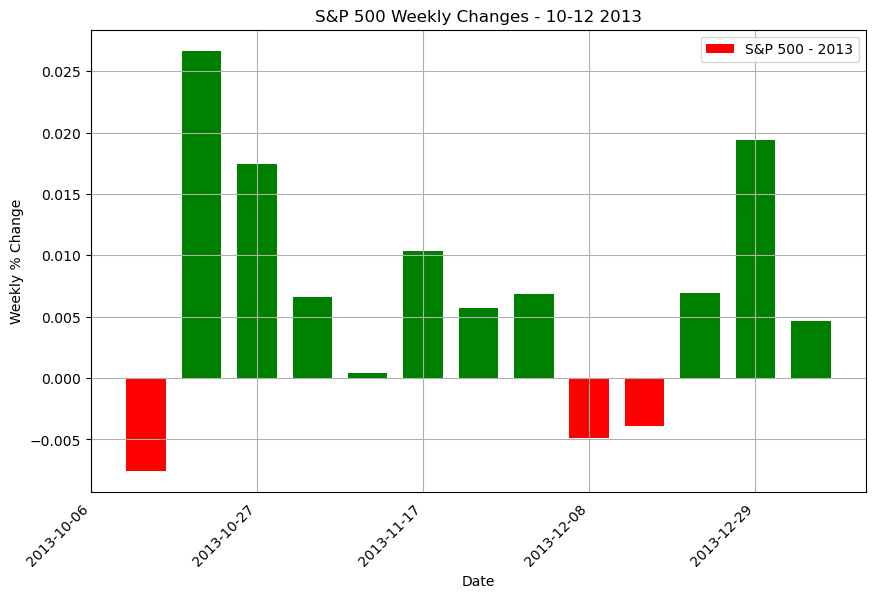

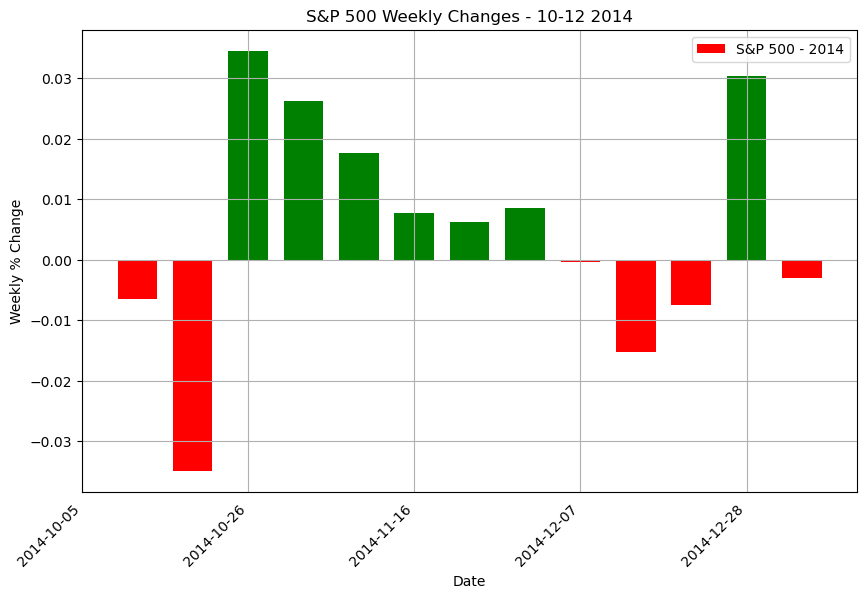

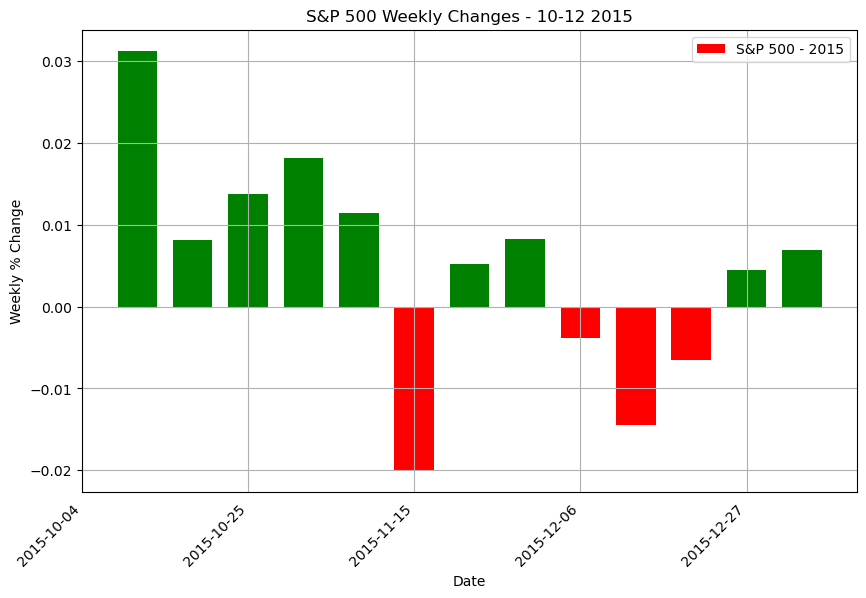

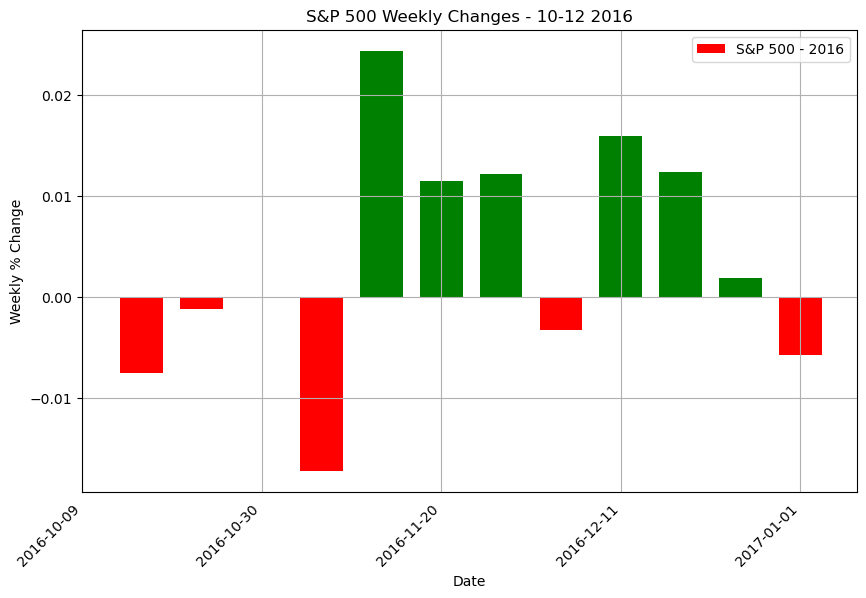

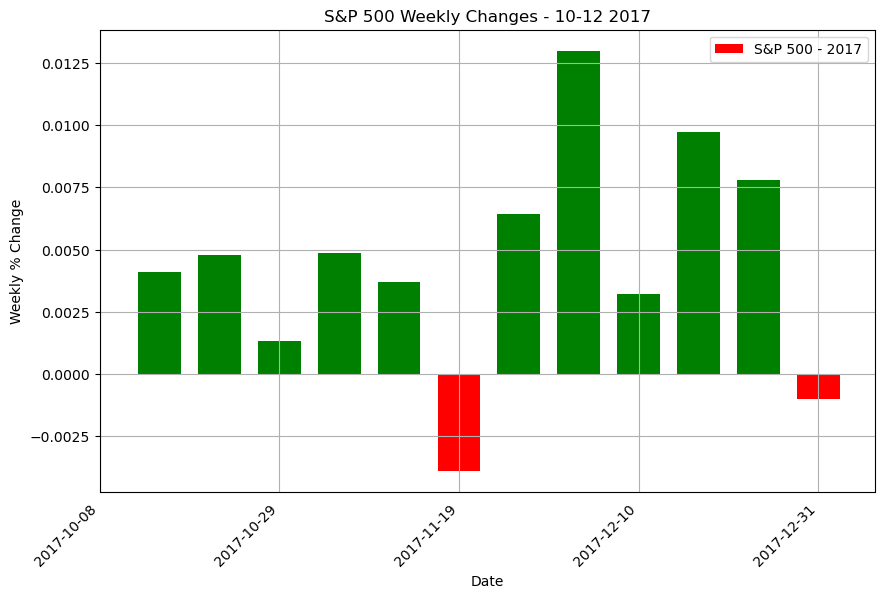

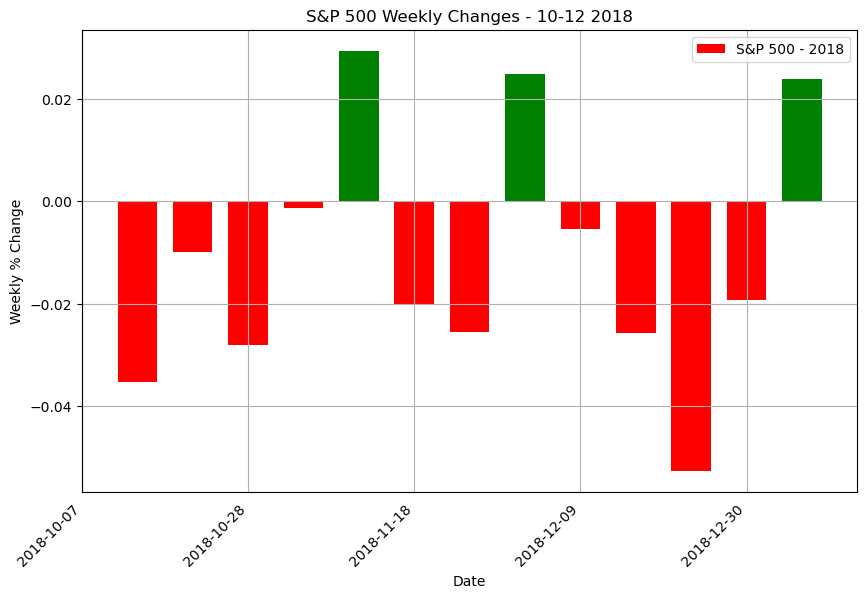

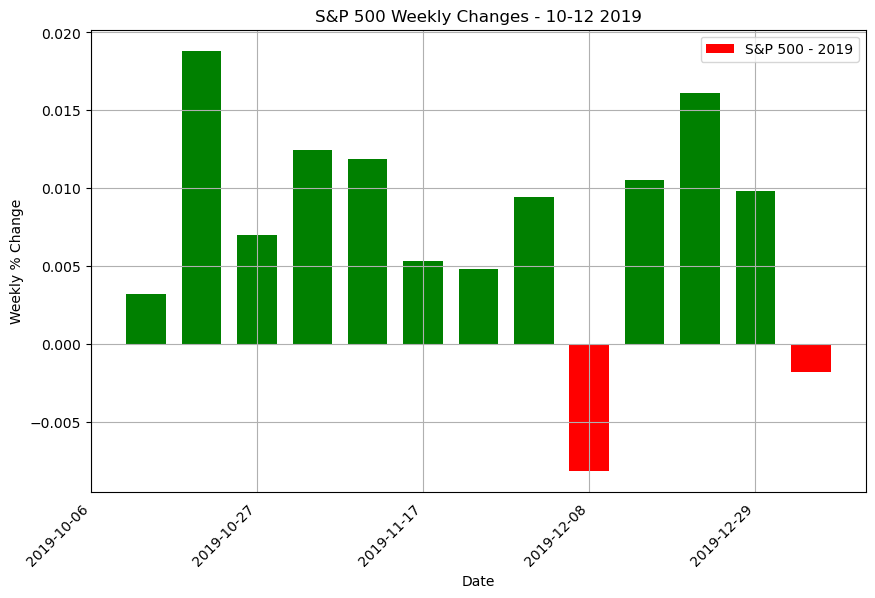

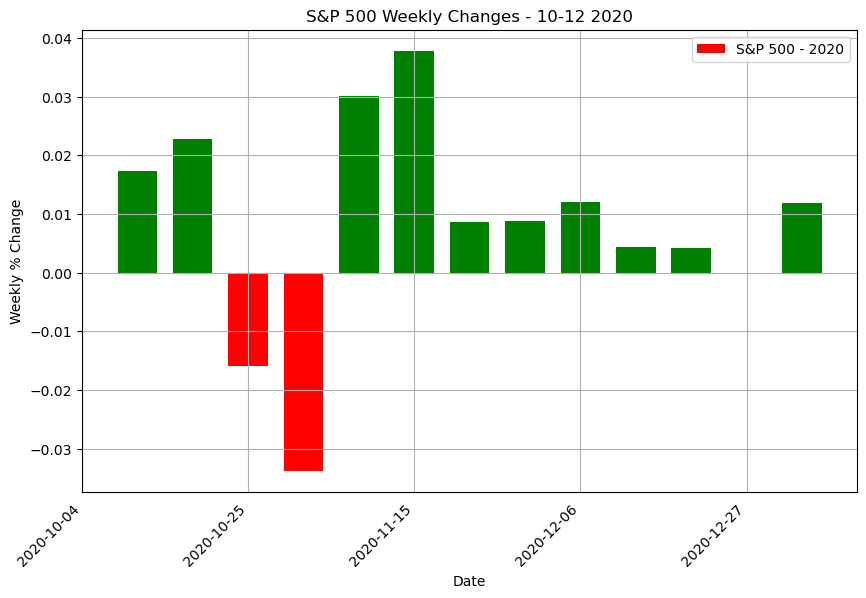

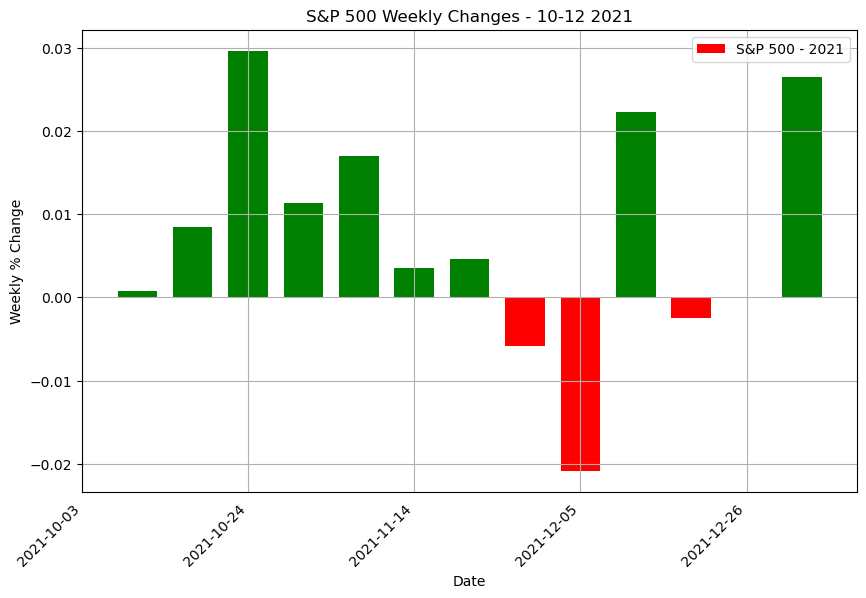

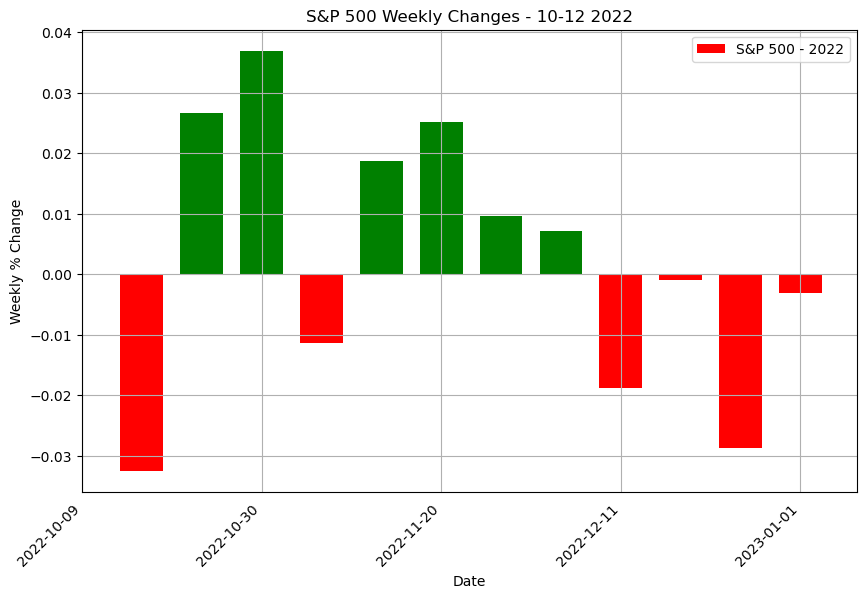

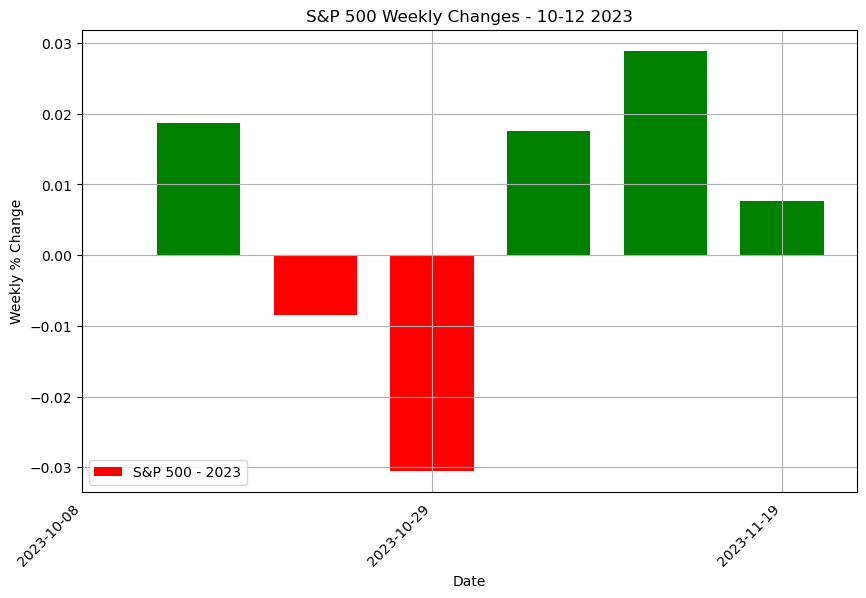

In [4]:
def plot_monthly_changes(stock_data, start_month, end_month, years):
    for year in years:
        # Filter data for the specified year and months
        stock_data_year = stock_data[(stock_data.index.year == year) & (stock_data.index.month >= start_month) & (stock_data.index.month <= end_month)]

        # Resample data to get weekly averages
        weekly_data = stock_data_year.resample('W').mean()

        # Calculate weekly changes
        weekly_changes = weekly_data['Close'].pct_change()
        
        colors = np.where(weekly_changes >= 0, 'g', 'r')

        # Adjust color intensity based on the magnitude of change
        intensities = np.abs(weekly_changes) * 0.5 + 0.5

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.bar(weekly_changes.index, weekly_changes, width=5, label=f'S&P 500 - {year}', color=colors)
        plt.title(f'S&P 500 Weekly Changes - {start_month}-{end_month} {year}')
        plt.xlabel('Date')
        plt.ylabel('Weekly % Change')
        plt.xticks(weekly_changes.index[::3], rotation=45, ha='right')

        # Add visual tick marks for every day
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, width=0.5)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_monthly_changes(stock_data, start_month, end_month, years)

In [5]:
def calculate_weekly_changes(stock_data):
    weekly_data = stock_data.resample('W').mean()
    weekly_changes = weekly_data['Close'].pct_change().dropna()
    return weekly_changes

def plot_weekly_changes(weekly_changes, title):
    plt.figure(figsize=(10, 6))
    
    # Set color based on positive/negative change
    colors = ['g' if change >= 0 else 'r' for change in weekly_changes]
    
    # Adjust color intensity based on the magnitude of change
    intensities = np.abs(weekly_changes) * 0.5 + 0.5
    
    plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Weekly % Change')
    plt.grid(True)
    plt.show()

def run_linear_regression(weekly_changes, alpha=0.05):
    X = np.arange(len(weekly_changes)).reshape(-1, 1)
    y = weekly_changes.values.reshape(-1, 1)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the trend
    trend = model.predict(X)

    # Calculate residuals
    residuals = y - trend

    # Plotting residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(weekly_changes.index, residuals, c='blue', s=100, edgecolors='k', alpha=0.7)
    plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero Residual')
    plt.title('Residuals Analysis')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


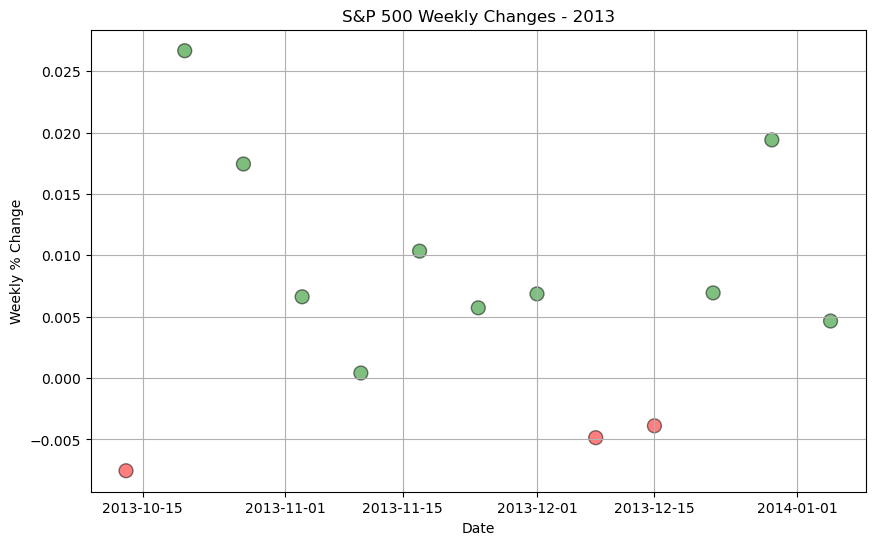

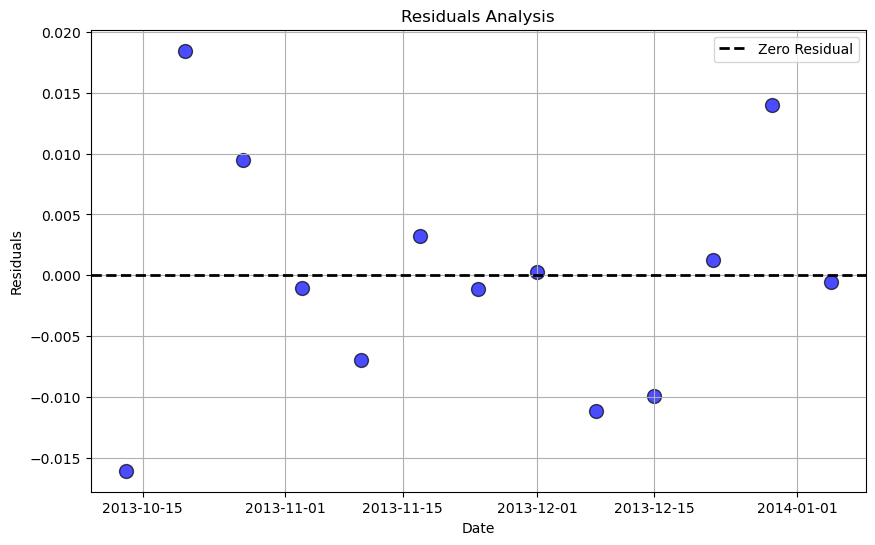

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


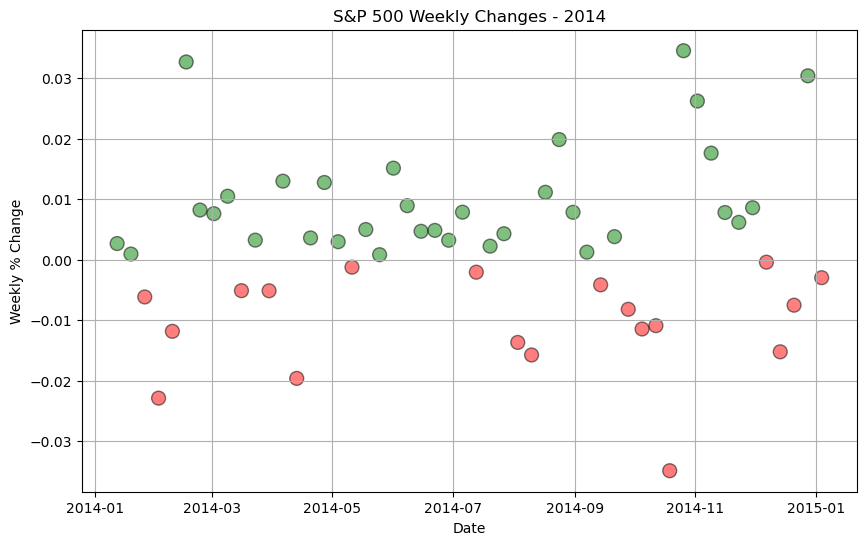

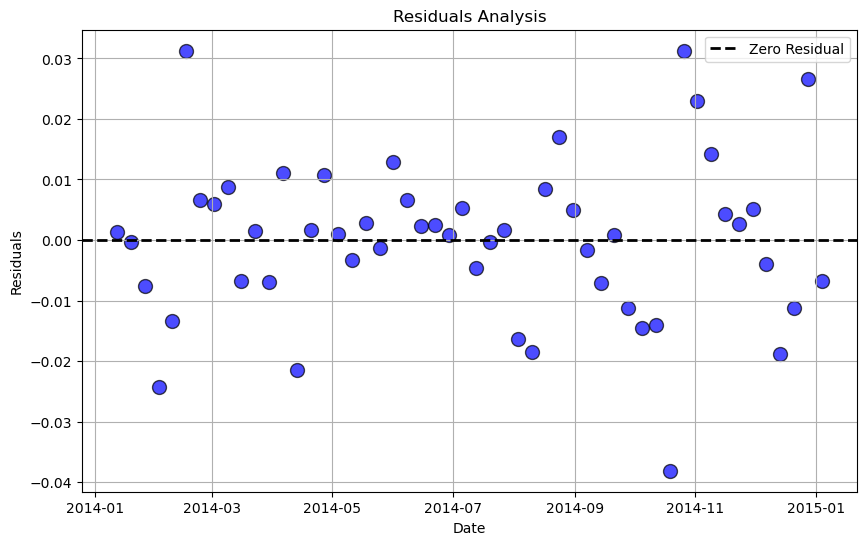

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


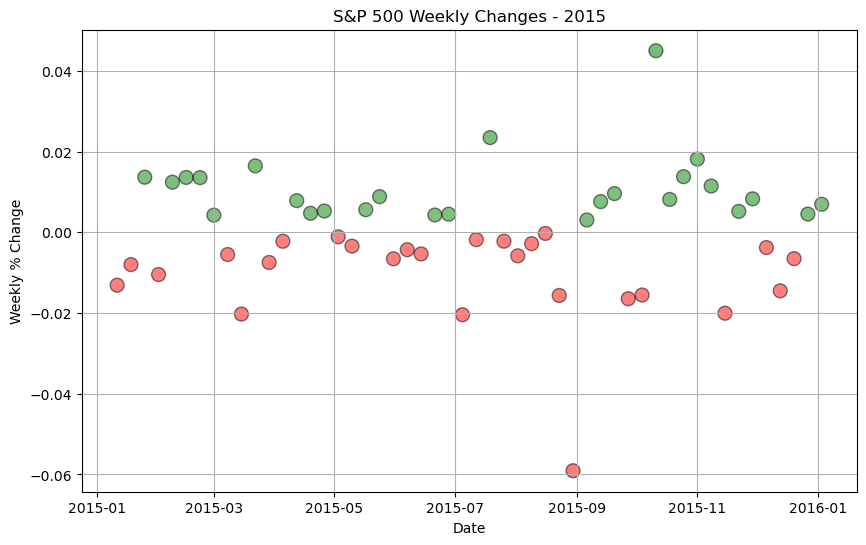

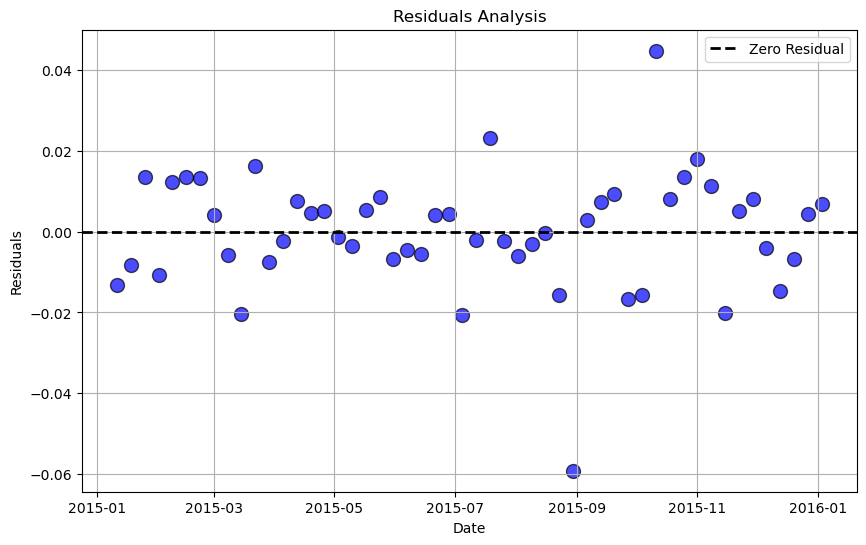

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


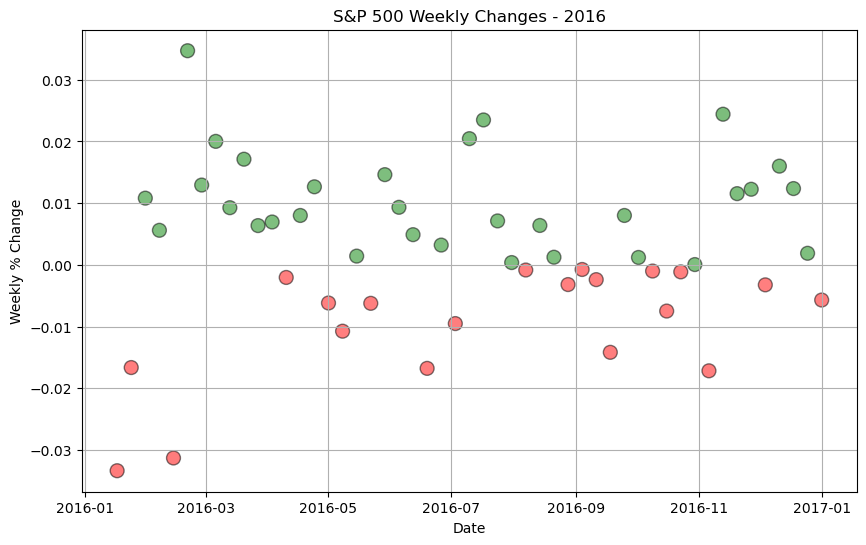

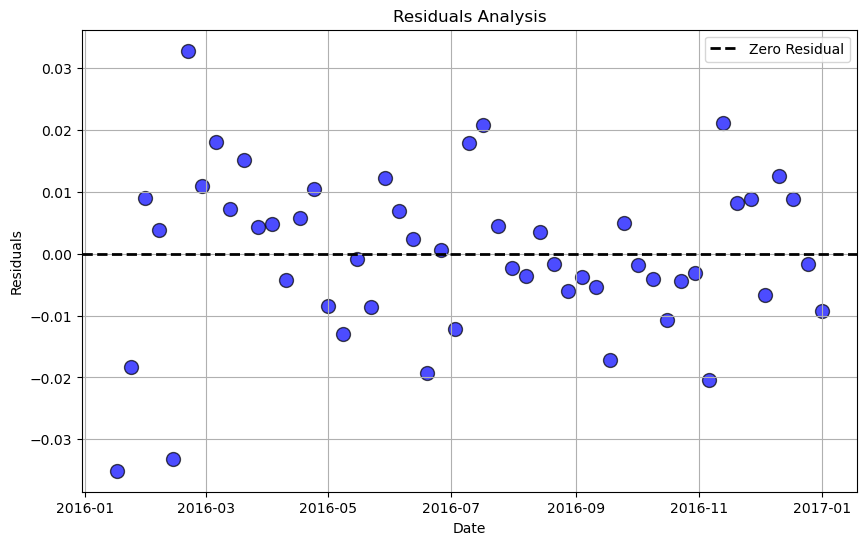

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


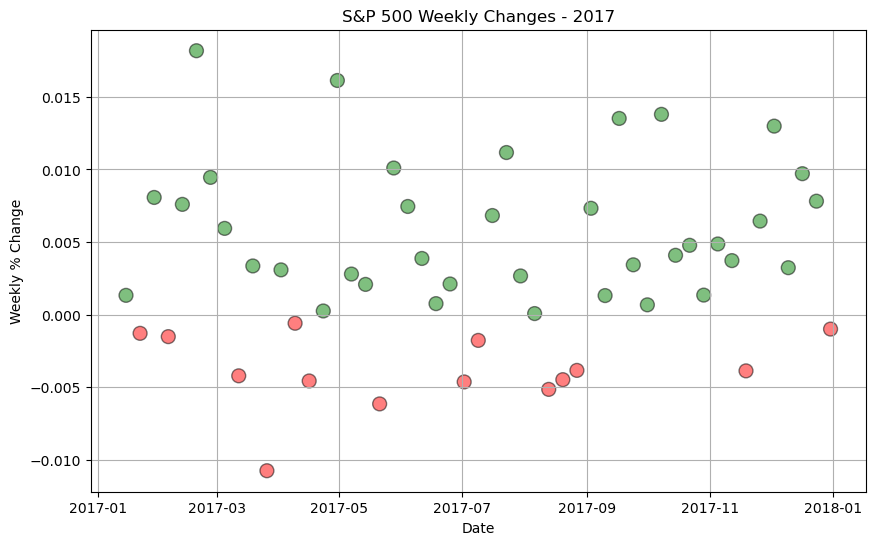

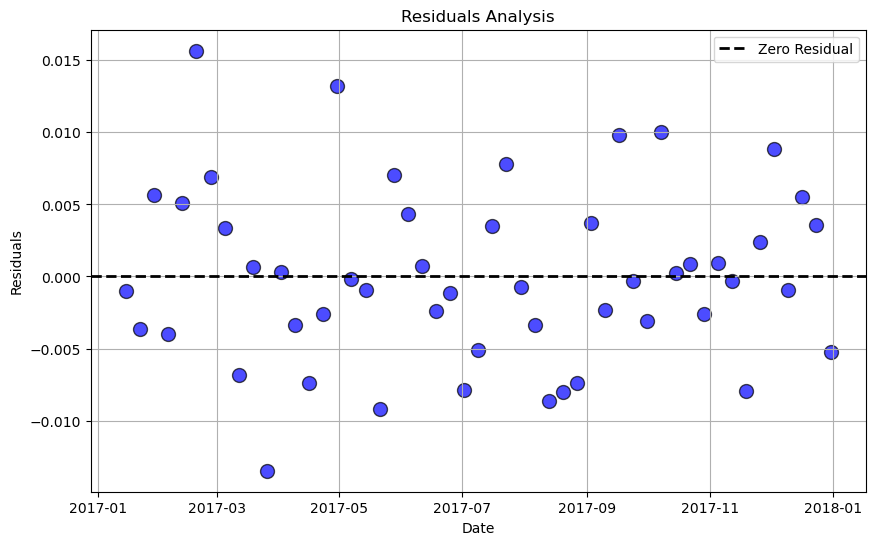

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


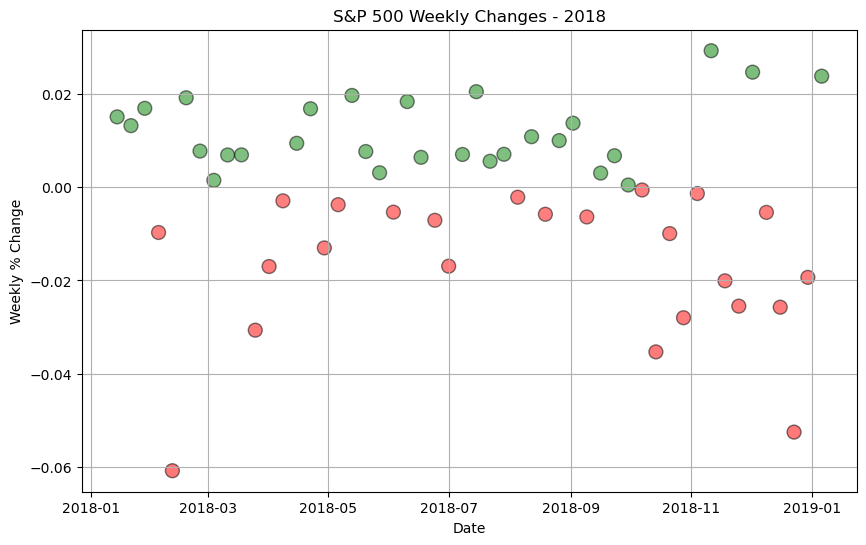

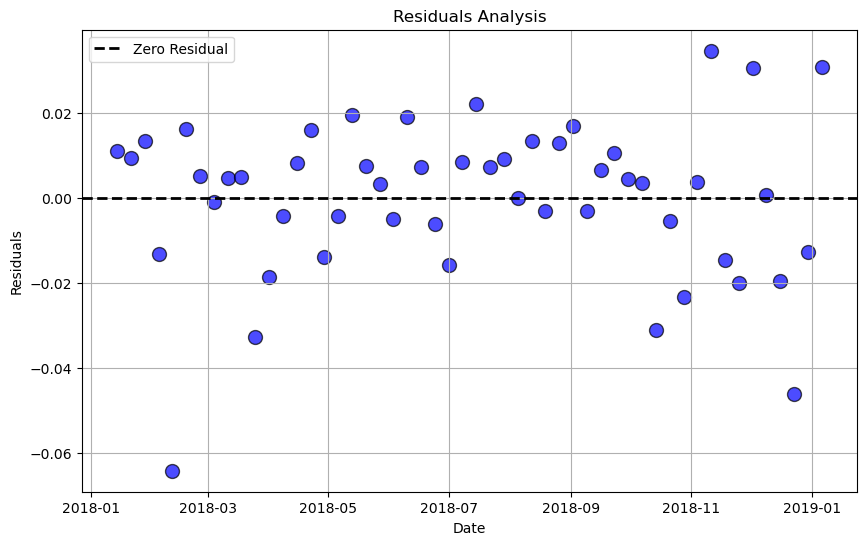

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


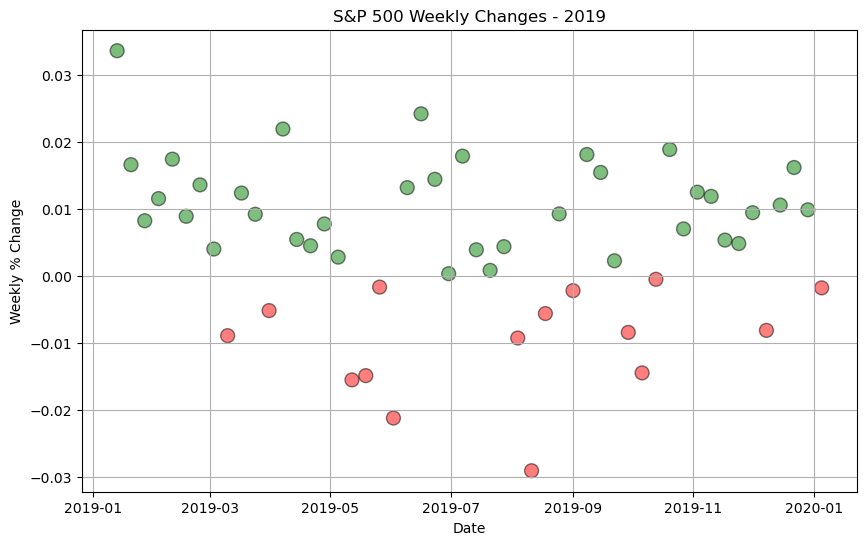

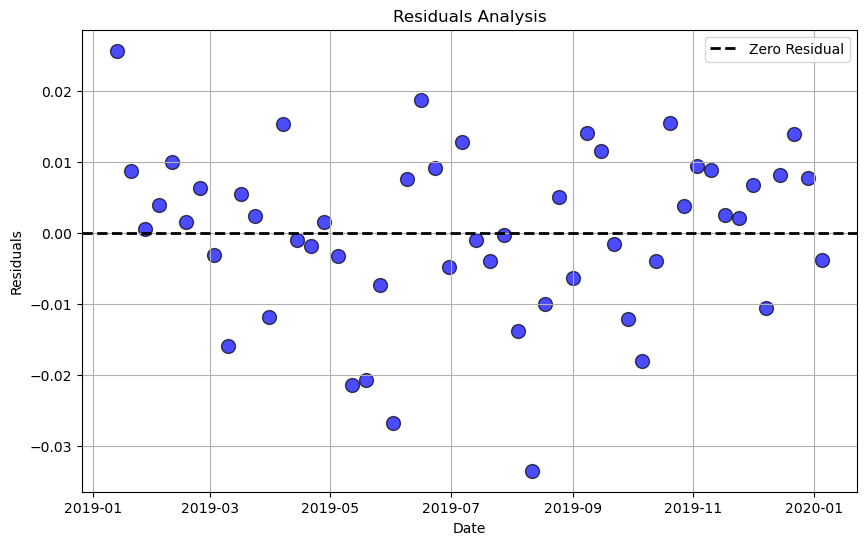

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


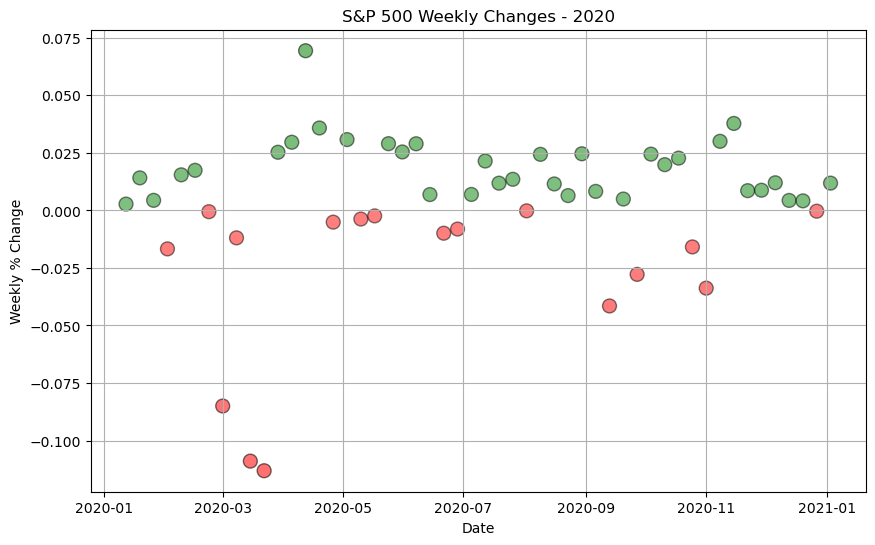

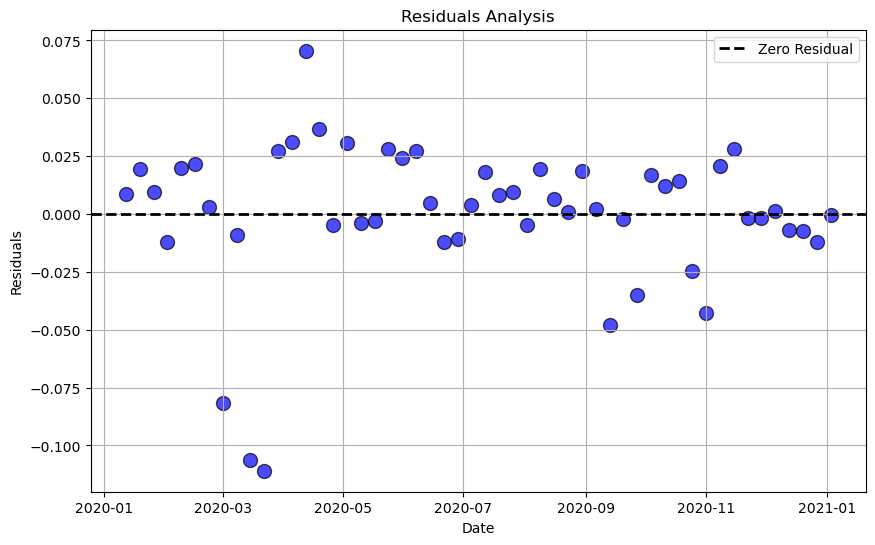

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


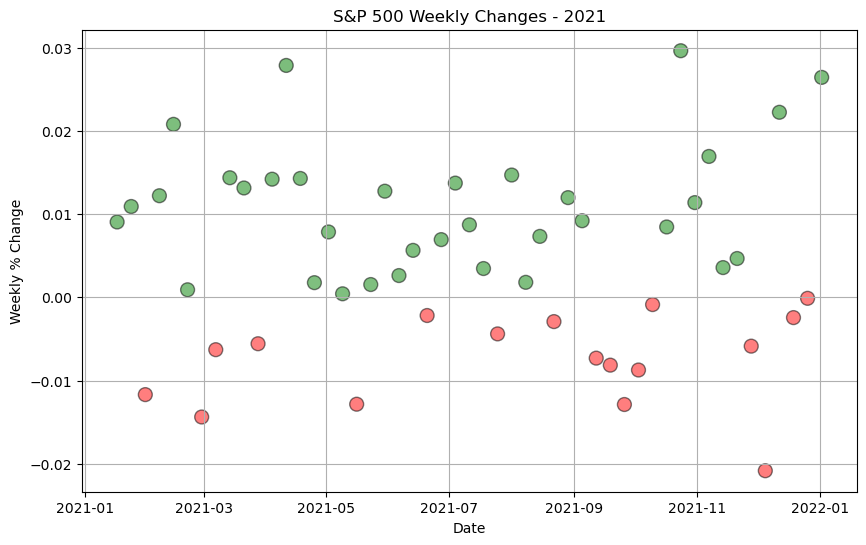

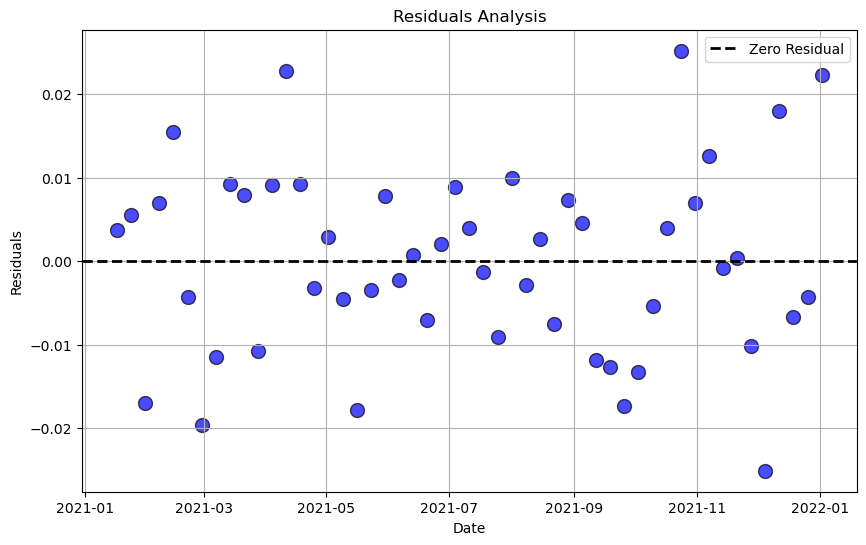

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


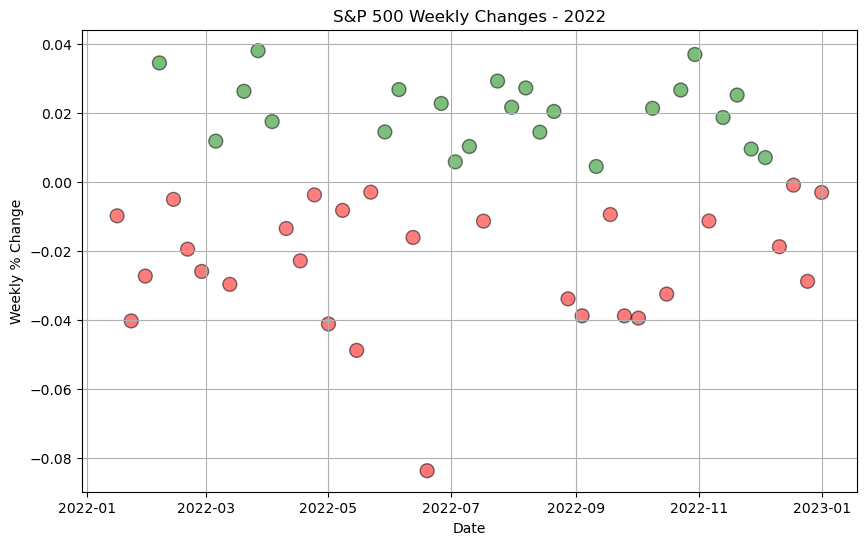

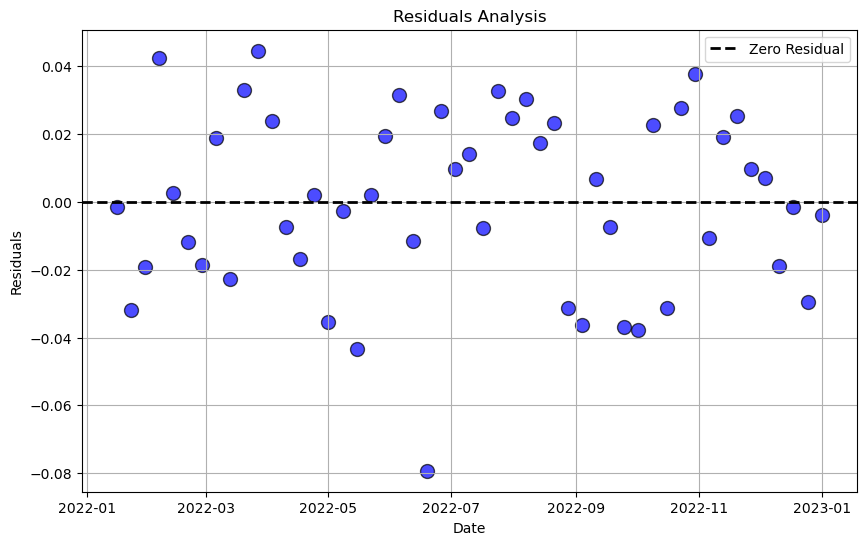

C:\Users\arneyh\AppData\Local\Temp\ipykernel_21788\1060934700.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(weekly_changes.index, weekly_changes, c=colors, s=100, cmap='RdYlGn', edgecolors='k', alpha=intensities)


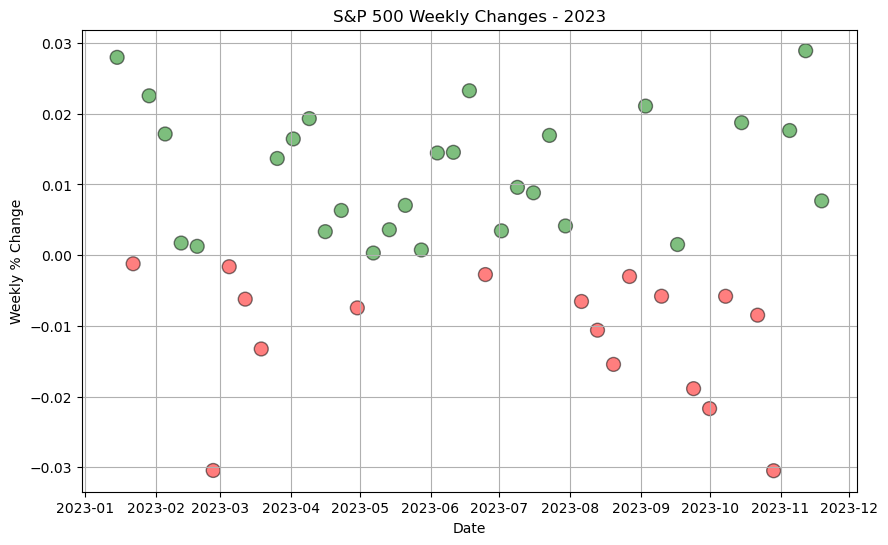

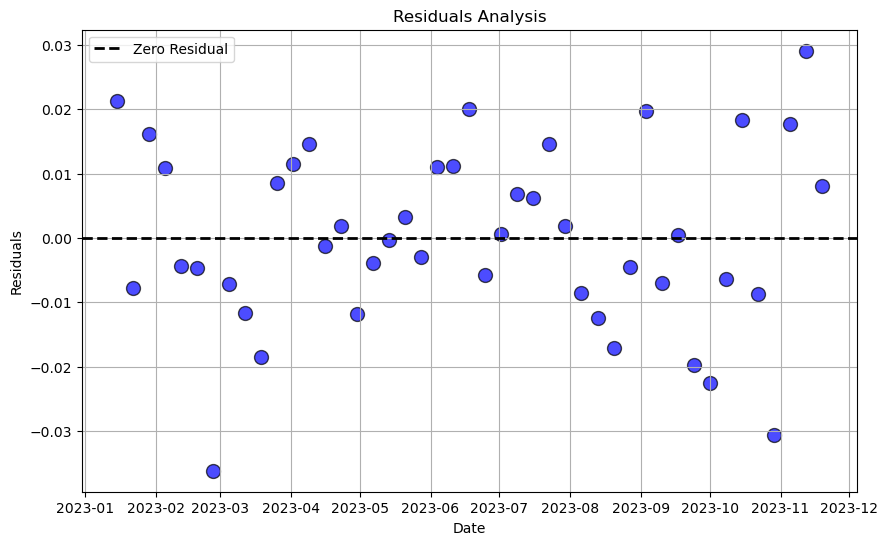

In [6]:
for year in years:
        stock_data_year = stock_data[stock_data.index.year == year]
        weekly_changes = calculate_weekly_changes(stock_data_year)
        plot_weekly_changes(weekly_changes, f'S&P 500 Weekly Changes - {year}')
        run_linear_regression(weekly_changes)

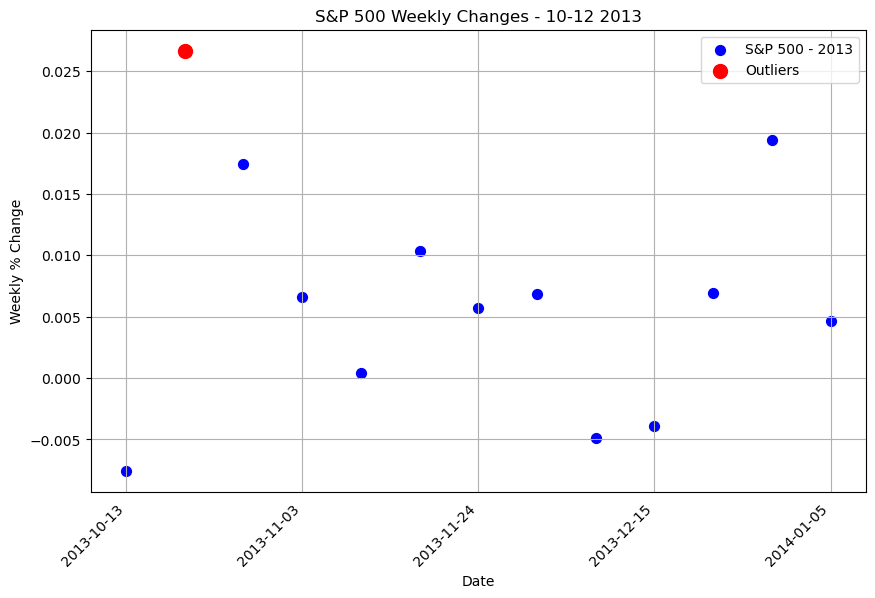

Z-scores for 2013: Date
2013-10-13   -1.507622
2013-10-20    2.080750
2013-10-27    1.112940
2013-11-03   -0.021564
2013-11-10   -0.673012
2013-11-17    0.368569
2013-11-24   -0.115824
2013-12-01    0.003090
2013-12-08   -1.225356
2013-12-15   -1.123855
2013-12-22    0.011781
2013-12-29    1.318806
2014-01-05   -0.228703
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2013: [0.13165133 0.0374568  0.26573398 0.98279565 0.50093944 0.71244898
 0.90779177 0.99753479 0.22044124 0.26107459 0.99060043 0.18723382
 0.81909958]
Outliers for 2013: DatetimeIndex(['2013-10-20'], dtype='datetime64[ns]', name='Date', freq='W-SUN')



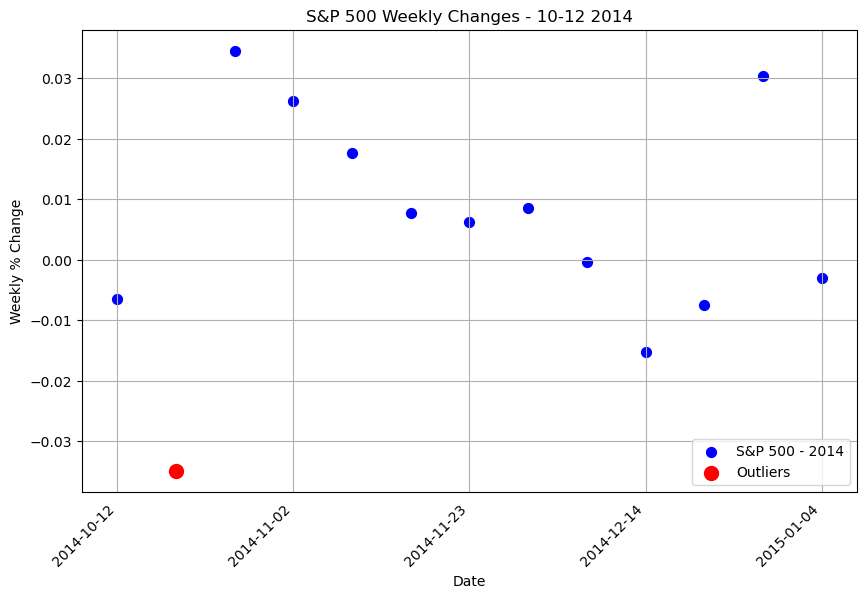

Z-scores for 2014: Date
2014-10-12   -0.612251
2014-10-19   -2.131284
2014-10-26    1.587376
2014-11-02    1.141616
2014-11-09    0.680472
2014-11-16    0.154914
2014-11-23    0.067754
2014-11-30    0.197289
2014-12-07   -0.284787
2014-12-14   -1.078436
2014-12-21   -0.665693
2014-12-28    1.365173
2015-01-04   -0.422142
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2014: [0.54037184 0.03306575 0.11242758 0.25361383 0.49620563 0.87688926
 0.94598178 0.84360134 0.77580772 0.2808394  0.50560706 0.17219872
 0.67292115]
Outliers for 2014: DatetimeIndex(['2014-10-19'], dtype='datetime64[ns]', name='Date', freq='W-SUN')



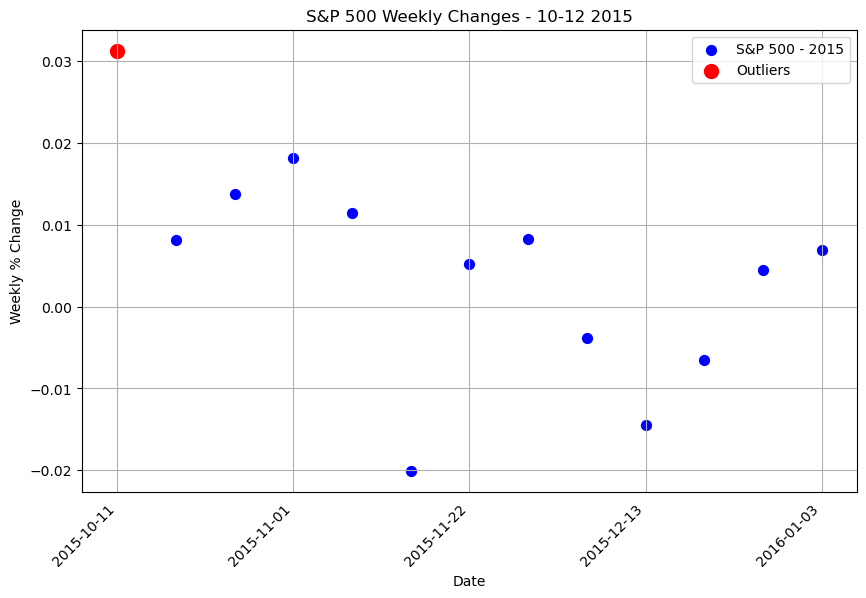

Z-scores for 2015: Date
2015-10-11    2.022552
2015-10-18    0.252367
2015-10-25    0.683113
2015-11-01    1.016782
2015-11-08    0.506402
2015-11-15   -1.902392
2015-11-22    0.026328
2015-11-29    0.263789
2015-12-06   -0.658327
2015-12-13   -1.478134
2015-12-20   -0.868629
2015-12-27   -0.024746
2016-01-03    0.160895
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2015: [0.04311935 0.80075755 0.49453532 0.30925734 0.61257466 0.05711997
 0.97899565 0.79194223 0.5103278  0.1393719  0.38505014 0.98025766
 0.87217608]
Outliers for 2015: DatetimeIndex(['2015-10-11'], dtype='datetime64[ns]', name='Date', freq='W-SUN')



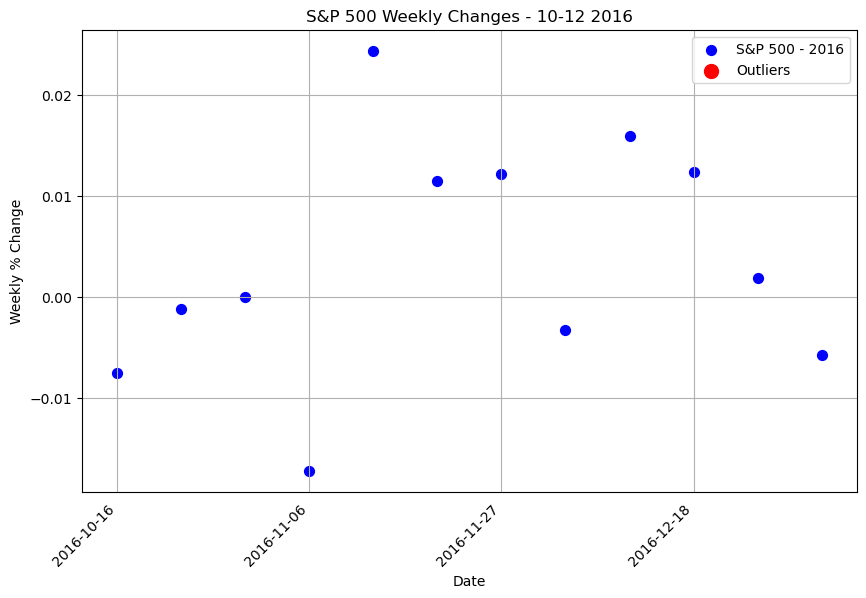

Z-scores for 2016: Date
2016-10-16   -0.986948
2016-10-23   -0.423965
2016-10-30   -0.318926
2016-11-06   -1.845290
2016-11-13    1.840745
2016-11-20    0.699964
2016-11-27    0.762804
2016-12-04   -0.610398
2016-12-11    1.094687
2016-12-18    0.772819
2016-12-25   -0.157004
2017-01-01   -0.828489
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2016: [0.32366826 0.67159105 0.74978299 0.06499538 0.06565901 0.48394958
 0.44558047 0.5415985  0.27365361 0.43962952 0.87524197 0.40739349]
Outliers for 2016: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq='W-SUN')



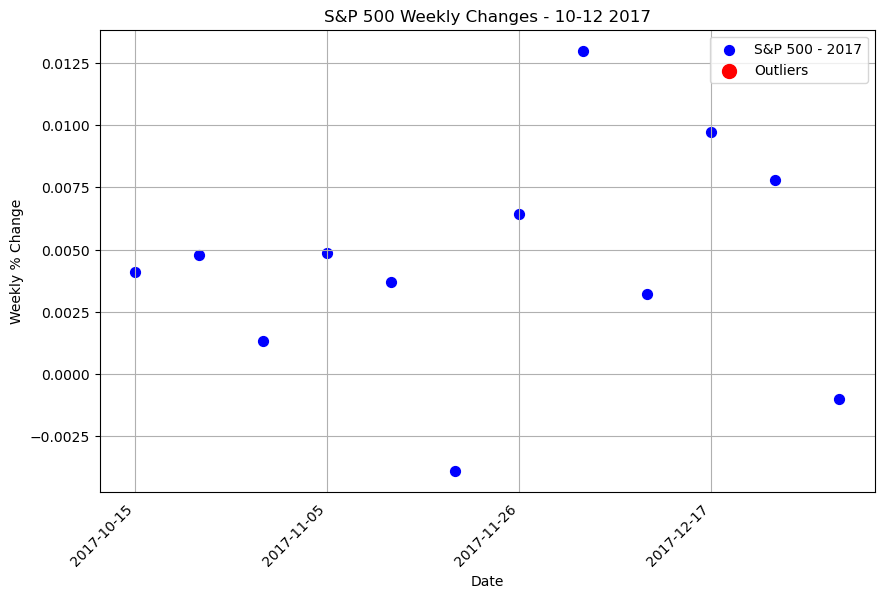

Z-scores for 2017: Date
2017-10-15   -0.096986
2017-10-22    0.061274
2017-10-29   -0.727975
2017-11-05    0.082380
2017-11-12   -0.181237
2017-11-19   -1.928489
2017-11-26    0.444656
2017-12-03    1.949769
2017-12-10   -0.293638
2017-12-17    1.196159
2017-12-24    0.760422
2017-12-31   -1.266336
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2017: [0.92273773 0.95114115 0.46662904 0.93434423 0.85618142 0.05379434
 0.6565685  0.05120363 0.76903442 0.23163435 0.44700222 0.20539274]
Outliers for 2017: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq='W-SUN')



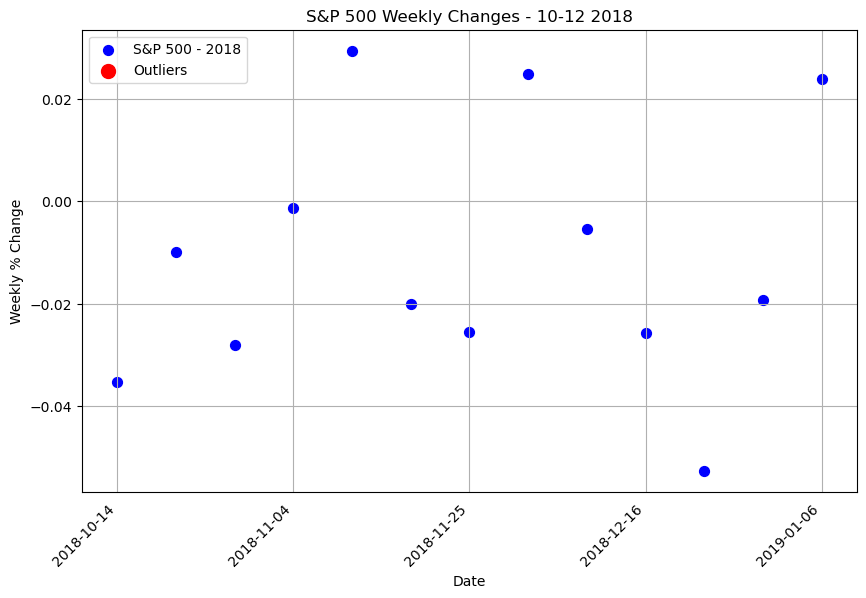

Z-scores for 2018: Date
2018-10-14   -1.010378
2018-10-21    0.051981
2018-10-28   -0.703637
2018-11-04    0.411633
2018-11-11    1.694110
2018-11-18   -0.372233
2018-11-25   -0.599716
2018-12-02    1.501414
2018-12-09    0.242398
2018-12-16   -0.609152
2018-12-23   -1.730773
2018-12-30   -0.341134
2019-01-06    1.465486
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2018: [0.31231442 0.95854384 0.48165893 0.68060852 0.09024435 0.70971972
 0.54869577 0.13324856 0.8084714  0.54242367 0.08349219 0.73300282
 0.1427885 ]
Outliers for 2018: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq='W-SUN')



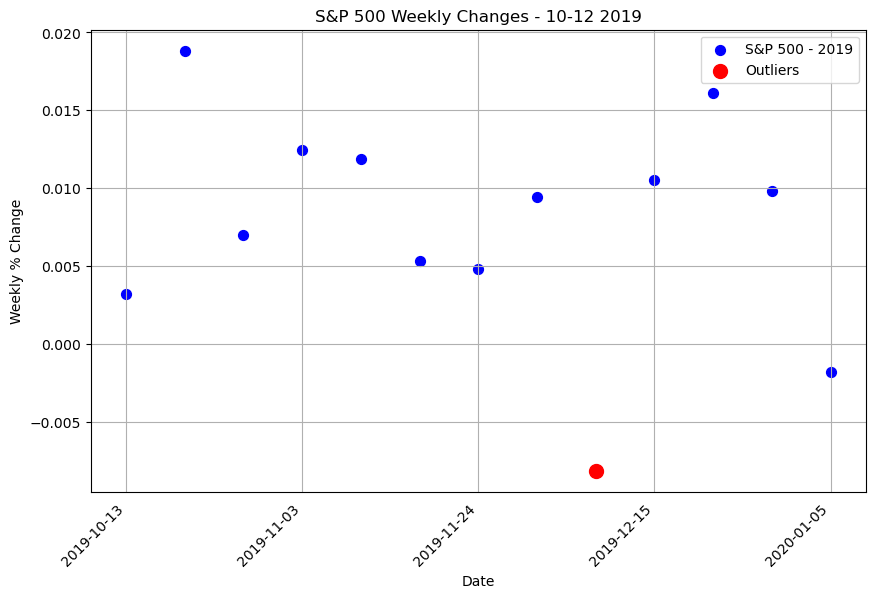

Z-scores for 2019: Date
2019-10-13   -0.643558
2019-10-20    1.610397
2019-10-27   -0.095192
2019-11-03    0.693647
2019-11-10    0.604367
2019-11-17   -0.335046
2019-11-24   -0.409144
2019-12-01    0.253462
2019-12-08   -2.274115
2019-12-15    0.416846
2019-12-22    1.223566
2019-12-29    0.315348
2020-01-05   -1.360578
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2019: [0.51986177 0.10731121 0.92416267 0.48790386 0.54559951 0.73759028
 0.68243411 0.79991118 0.02295909 0.67679087 0.22111602 0.75249752
 0.173647  ]
Outliers for 2019: DatetimeIndex(['2019-12-08'], dtype='datetime64[ns]', name='Date', freq='W-SUN')



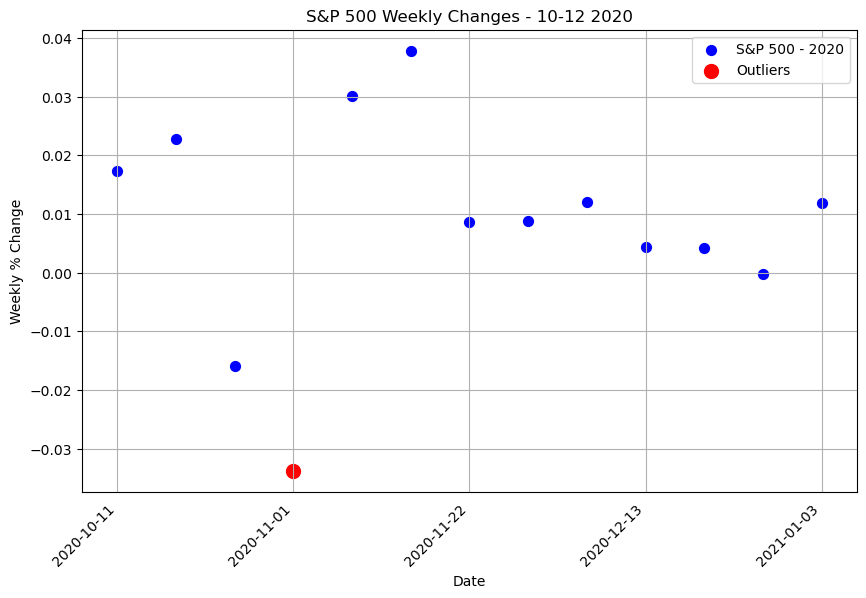

Z-scores for 2020: Date
2020-10-11    0.503087
2020-10-18    0.811876
2020-10-25   -1.355780
2020-11-01   -2.362414
2020-11-08    1.222604
2020-11-15    1.658848
2020-11-22    0.017375
2020-11-29    0.028356
2020-12-06    0.210489
2020-12-13   -0.220799
2020-12-20   -0.231262
2020-12-27   -0.483661
2021-01-03    0.201280
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2020: [0.61490282 0.41686306 0.17516929 0.01815636 0.22147936 0.09714641
 0.98613756 0.97737836 0.83328578 0.82524922 0.81711145 0.62862679
 0.84048001]
Outliers for 2020: DatetimeIndex(['2020-11-01'], dtype='datetime64[ns]', name='Date', freq='W-SUN')



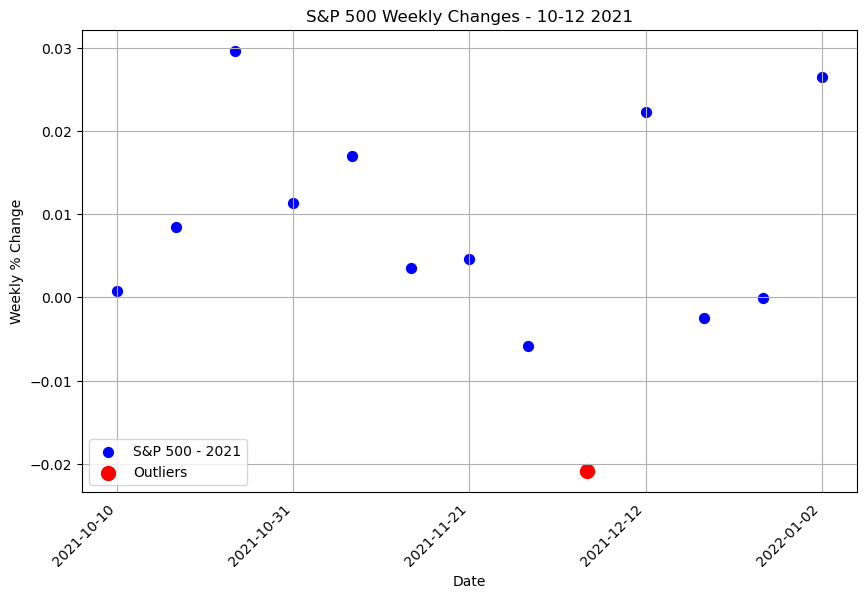

Z-scores for 2021: Date
2021-10-10   -0.486144
2021-10-17    0.086261
2021-10-24    1.652184
2021-10-31    0.302707
2021-11-07    0.712802
2021-11-14   -0.274682
2021-11-21   -0.194032
2021-11-28   -0.972890
2021-12-05   -2.079715
2021-12-12    1.105149
2021-12-19   -0.719197
2021-12-26   -0.547812
2022-01-02    1.415369
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2021: [0.62686505 0.93125896 0.09849702 0.7621135  0.47596849 0.78356056
 0.84615083 0.33060797 0.03755168 0.26909497 0.4720197  0.58382131
 0.15696038]
Outliers for 2021: DatetimeIndex(['2021-12-05'], dtype='datetime64[ns]', name='Date', freq='W-SUN')



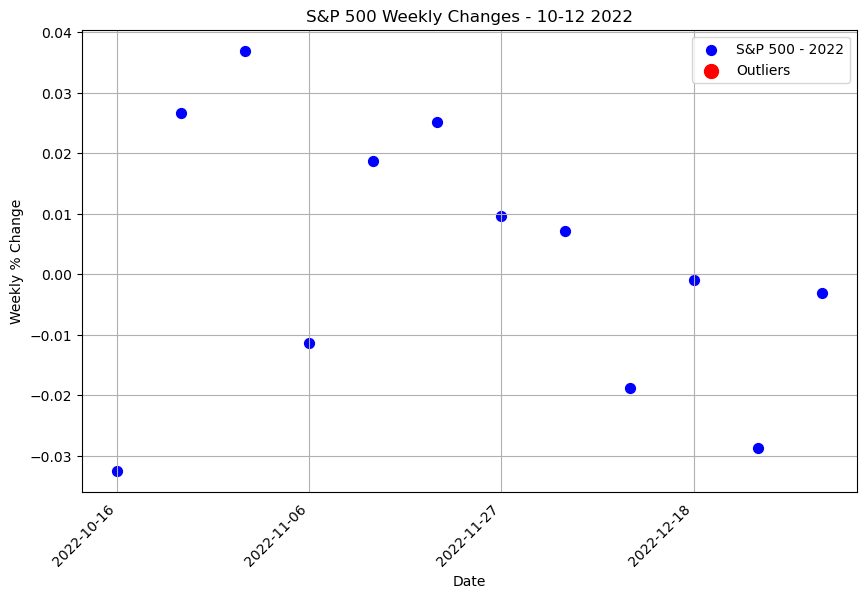

Z-scores for 2022: Date
2022-10-16   -1.628906
2022-10-23    1.132183
2022-10-30    1.612957
2022-11-06   -0.640059
2022-11-13    0.760592
2022-11-20    1.064161
2022-11-27    0.333401
2022-12-04    0.218049
2022-12-11   -0.987726
2022-12-18   -0.154882
2022-12-25   -1.455981
2023-01-01   -0.253790
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2022: [0.10333298 0.25755744 0.10675381 0.52213446 0.44690096 0.28725571
 0.73883189 0.82739059 0.32328707 0.87691405 0.14539777 0.79965815]
Outliers for 2022: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq='W-SUN')



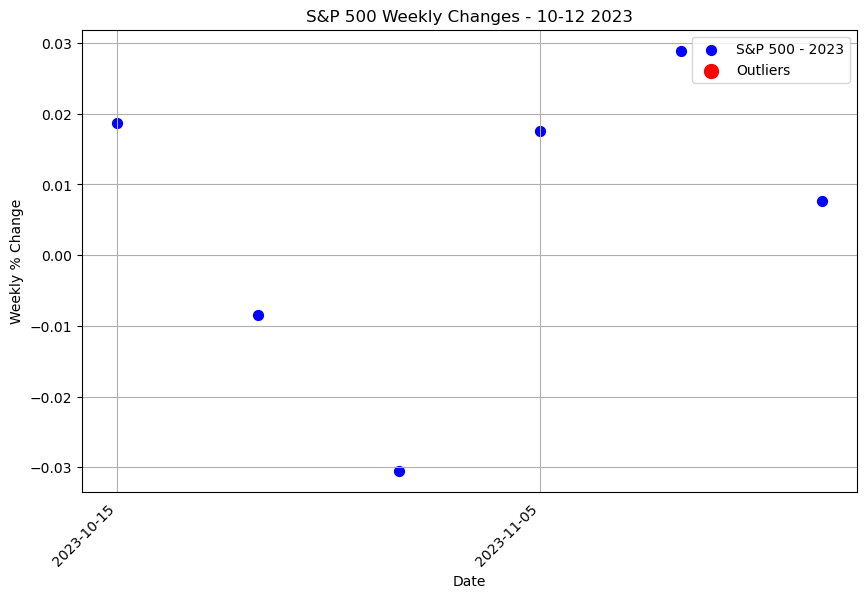

Z-scores for 2023: Date
2023-10-15    0.658332
2023-10-22   -0.712649
2023-10-29   -1.820543
2023-11-05    0.602530
2023-11-12    1.170908
2023-11-19    0.101421
Freq: W-SUN, Name: Close, dtype: float64
P-values for 2023: [0.5103246  0.47606307 0.06867637 0.54682123 0.24163589 0.91921591]
Outliers for 2023: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq='W-SUN')



In [13]:
def compare_years(stock_data, start_month, end_month, years):
    for year in years:
        stock_data_year = stock_data[(stock_data.index.year == year) & (stock_data.index.month >= start_month) & (stock_data.index.month <= end_month)]
        weekly_changes = calculate_weekly_changes(stock_data_year)

        # Z-score analysis
        z_scores = zscore(weekly_changes)
        p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values
        outliers = p_values < 0.05  # Adjust threshold as needed
        outlier_dates = weekly_changes.index[outliers]

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.scatter(weekly_changes.index, weekly_changes, c='b', s=50, label=f'S&P 500 - {year}')
        plt.scatter(outlier_dates, weekly_changes[outliers], c='r', s=100, label='Outliers')
        plt.title(f'S&P 500 Weekly Changes - {start_month}-{end_month} {year}')
        plt.xlabel('Date')
        plt.ylabel('Weekly % Change')
        plt.xticks(weekly_changes.index[::3], rotation=45, ha='right')
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, width=0.5)
        plt.legend()
        plt.grid(True)
        plt.show()

        # Display Z-score and p-value information
        print(f'Z-scores for {year}: {z_scores}')
        print(f'P-values for {year}: {p_values}')
        print(f'Outliers for {year}: {outlier_dates}\n')

compare_years(stock_data, start_month, end_month, years)